In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('../data/ab_test_game_events.csv')

In [3]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [4]:
len(df)

696840

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696840 entries, 0 to 696839
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AbGroup                      696840 non-null  object 
 1   user_id                      696840 non-null  object 
 2   time_stamp                   696840 non-null  object 
 3   install_date                 696840 non-null  object 
 4   event_name                   696840 non-null  object 
 5   platform                     696840 non-null  object 
 6   network_name                 696840 non-null  object 
 7   country_name                 696840 non-null  object 
 8   InGameTime                   696840 non-null  int64  
 9   LastCompletedLevel           696840 non-null  int64  
 10  avg_energy_amount            696840 non-null  float64
 11  revenue_on_event             696840 non-null  float64
 12  revenue_on_other_activities  696840 non-null  float64
 13 

# Group check

In [6]:
df['AbGroup'].value_counts()

AbGroup
Control    558070
Test       138770
Name: count, dtype: int64

In [7]:
df['AbGroup'].value_counts(normalize=True)

AbGroup
Control    0.800858
Test       0.199142
Name: proportion, dtype: float64

In [8]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


Проверка есть ли пересечения в группах

In [9]:
df.groupby('user_id')['AbGroup'].nunique().reset_index().query('AbGroup > 1').shape[0]

352

In [10]:
df.groupby('AbGroup')[['platform','network_name']].value_counts(normalize=True)

AbGroup  platform  network_name
Control  itunes    Paid            0.630184
                   Organic         0.369816
Test     itunes    Paid            0.636370
                   Organic         0.363630
Name: proportion, dtype: float64

In [11]:
df.groupby('AbGroup')[['country_name']].value_counts(normalize=True).groupby('AbGroup').head(5)

AbGroup  country_name                                        
Control  United Kingdom of Great Britain and Northern Ireland    0.266932
         Germany                                                 0.246145
         France                                                  0.227122
         Canada                                                  0.122456
         Spain                                                   0.111930
Test     United Kingdom of Great Britain and Northern Ireland    0.267788
         Germany                                                 0.240376
         France                                                  0.226785
         Canada                                                  0.123989
         Spain                                                   0.114801
Name: proportion, dtype: float64

In [12]:
df.groupby('AbGroup')[['avg_energy_amount']].value_counts(normalize=True).groupby('AbGroup').head(5)

AbGroup  avg_energy_amount
Control  60.0                 0.034895
         50.0                 0.034693
         30.0                 0.028016
         100.0                0.027050
         40.0                 0.026803
Test     60.0                 0.035173
         50.0                 0.034143
         30.0                 0.028320
         100.0                0.027182
         40.0                 0.026677
Name: proportion, dtype: float64

Видно что группы абсолютно одиннаковые

Следовательно мы можем поверить если у нас будет какое либо стат значимое

# EDA

In [13]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [14]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'],format='%Y-%m-%d')
df['install_date'] = pd.to_datetime(df['install_date'],format='%Y-%m-%d')

<Axes: xlabel='time_stamp'>

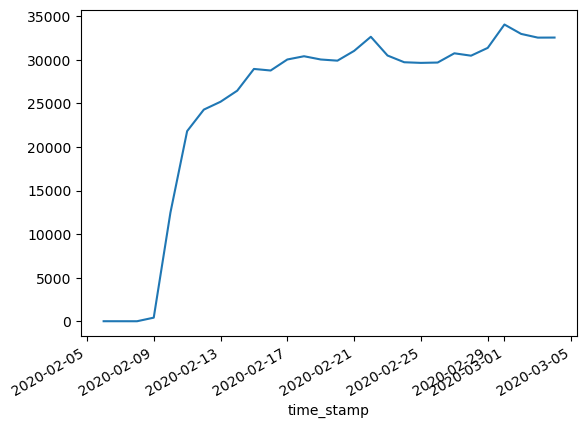

In [15]:
df.groupby('time_stamp')['user_id'].count().plot()

<Axes: xlabel='time_stamp'>

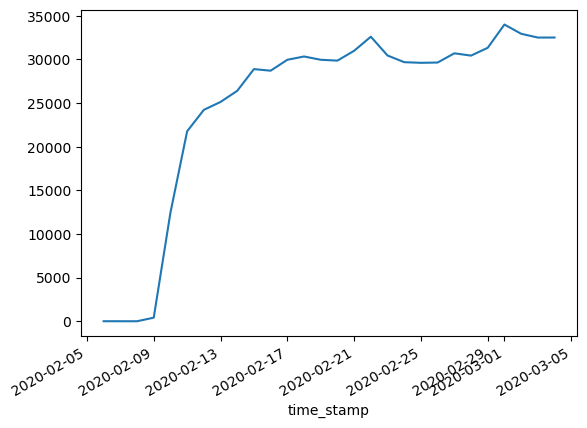

In [16]:
df.groupby('time_stamp')['user_id'].nunique().plot()

In [17]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


In [18]:
df.describe()

,time_stamp,install_date,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,696840,696840,6.968400e+05,696840.000000,6.968400e+05,696840.0,696840.0,45412.000000,168193.000000
mean,2020-02-22 06:57:49.564318976,2019-08-18 14:18:25.355604736,2.448543e+06,426.099963,1.485821e+05,0.0,0.0,1992.865322,936.481899
min,2020-02-06 00:00:00,2018-03-11 00:00:00,-2.128381e+09,-1.000000,0.000000e+00,0.0,0.0,500.000000,100.000000
25%,2020-02-17 00:00:00,2019-03-20 00:00:00,3.314100e+04,59.000000,3.700000e+01,0.0,0.0,500.000000,500.000000
50%,2020-02-22 00:00:00,2019-10-30 00:00:00,1.729600e+05,245.000000,5.200000e+01,0.0,0.0,1000.000000,600.000000
75%,2020-02-28 00:00:00,2020-01-31 00:00:00,5.094630e+05,735.000000,7.300000e+01,0.0,0.0,2400.000000,1000.000000
max,2020-03-04 00:00:00,2020-03-04 00:00:00,2.139124e+09,1299.000000,2.123448e+09,0.0,0.0,189600.000000,755950.000000
std,NaN,NaN,1.210664e+08,434.405962,1.764010e+07,0.0,0.0,3895.541280,3522.989145


<Axes: >

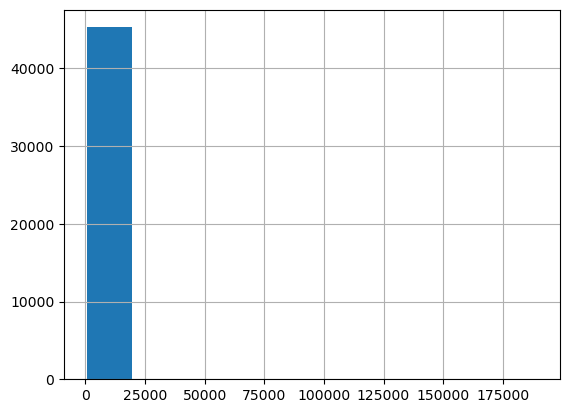

In [19]:
df['gold_on_event'].hist()

<Axes: >

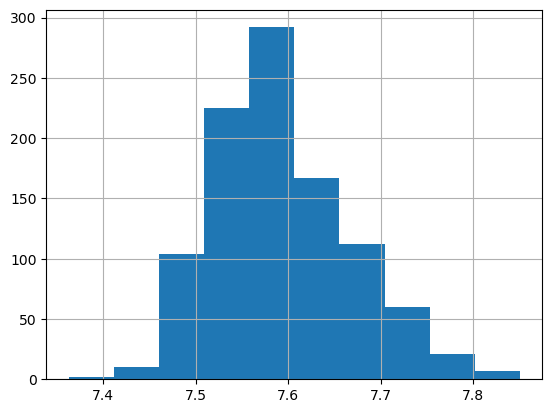

In [20]:
result = []
n = 1000
for i in range(n):
  result.append(np.log(df['gold_on_event'].sample(10000,replace=True).mean()))
pd.Series(result).hist()

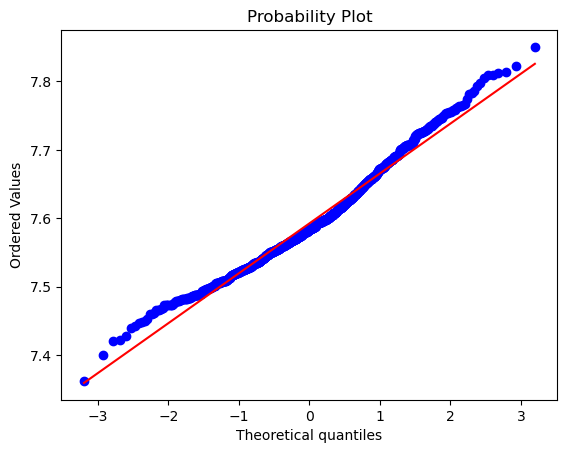

In [21]:
import pylab
import scipy.stats as stats

stats.probplot(pd.Series(result), dist="norm", plot=pylab)
pylab.show()

We can't use t-test because the CPT is not being followed

<Axes: >

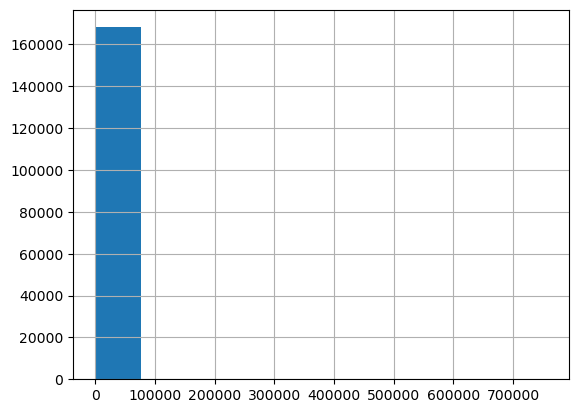

In [22]:
df['gold_on_other_activities'].hist()

In [ ]:
df['gold_on_event_flag'] = df['gold_on_event'] > 0
df.groupby('AbGroup')['gold_on_event_flag'].mean()

AbGroup
Control    0.06523
Test       0.06492
Name: gold_on_event_flag, dtype: float64

Randomization Unit - user   
Unit of Analysis - user

Using 2 metrics    
* Change in gold spent for those who have spent anything    
* Change in gold spent for everyone   

CTR has no visible change

I will do a statistical significance check with bootstrap because its results are distribution-independent

H0: Values were obtained from one General Population    
H1: Values from different General Populations

# Gold on event per user who spent (ARPPU)

In [ ]:
df.groupby('AbGroup')['gold_on_event'].agg(['mean','median'])

,mean,median
AbGroup,,
Control,1965.211658,1000.0
Test,2104.606505,1500.0


In [ ]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_flag
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,False
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,False
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,False
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,False
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,True


In [ ]:
group_size = df['AbGroup'].value_counts().values

In [ ]:
n = 1000
result = []
base_diff = 500

for _ in tqdm(range(n)):
  a = df['gold_on_event'].sample(group_size[0],replace=True).median()
  b = df['gold_on_event'].sample(group_size[1],replace=True).median()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
np.mean(result)

0.124

In [ ]:
n = 1000
result = []
base_diff = 2104.606505 - 1965.211658

for _ in tqdm(range(n)):
  a = df['gold_on_event'].sample(group_size[0],replace=True).mean()
  b = df['gold_on_event'].sample(group_size[1],replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
np.mean(result)

0.001

The probability of getting the same difference as ours under the null hypothesis is 0.5 percent => unlikely

# Gold on event per user (ARPU)

In [ ]:
#New variable because the original one will still be used
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

In [ ]:
df.groupby('AbGroup')['gold_on_event_nona'].agg(['mean','median'])

,mean,median
AbGroup,,
Control,128.191087,0.0
Test,136.631837,0.0


In [ ]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df['gold_on_event_nona'].sample(group_size[0],replace=True).mean()
  b = df['gold_on_event_nona'].sample(group_size[1],replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
np.mean(result)

0.01

# Bucketing

I want to try to optimize the bootstrap, for this purpose let's divide the users into bucket and calculate the average for them. To do this we need


1.   Find the common denominator
2.   Check the mean and variance of new dataset



In [ ]:
n = df.shape[0]
n

696840

In [24]:
# observation per basket
b_n = 10
n = df['AbGroup'].value_counts().values
#baskets per group
n1 = int(n[0] / b_n)
n2 = int(n[1] / b_n)

test = df.sort_values('AbGroup').copy()
test.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
438703,Control,ae2b9bd8adadd48aee84b5735e2f7edba2d88846,2020-02-22,2020-02-15,ResourceSpend,itunes,Paid,France,31613,47,40.0,0.0,0.0,NaN,1200.0
438705,Control,3e06f641b3a48f342367f7ae772822b7c82ad353,2020-02-24,2019-04-23,ResourceSpend,itunes,Organic,France,184310,301,39.0,0.0,0.0,NaN,500.0
438706,Control,6324111ee11f3e4258a7edeb39c3dd8a4a0cfecf,2020-02-22,2019-11-06,ResourceSpend,itunes,Organic,Canada,132,0,80.0,0.0,0.0,NaN,200.0
438708,Control,54725feb09770d1ce60ce94ac01351684e074500,2020-02-23,2019-01-08,ResourceSpend,itunes,Paid,France,684641,1299,39.0,0.0,0.0,NaN,NaN


In [ ]:
test['bucket'] = [i for i in range(n1)]*b_n + [i for i in range(n2)] * b_n

In [ ]:
# find mean value for each group
bucketed_nona = test.groupby(by=["bucket","AbGroup"])["gold_on_event_nona"].agg(['mean','std']).reset_index()

### ARPU basket

In [ ]:
bucketed_nona.head()

,bucket,AbGroup,mean,std
0,0,Control,50.0,158.113883
1,0,Test,0.0,0.000000
2,1,Control,240.0,758.946638
3,1,Test,0.0,0.000000
4,2,Control,0.0,0.000000


In [ ]:
test["gold_on_event_nona"].describe()

count    696840.000000
mean        129.871994
std        1109.449419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      189600.000000
Name: gold_on_event_nona, dtype: float64

In [ ]:
bucketed_nona.describe()

,bucket,mean,std
count,69684.000000,69684.000000,69684.000000
mean,23727.991318,129.871994,364.683362
std,16767.496752,351.073205,1047.719873
min,0.000000,0.000000,0.000000
25%,8710.000000,0.000000,0.000000
50%,20964.500000,0.000000,0.000000
75%,38385.250000,240.000000,757.847830
max,55806.000000,19010.000000,59939.422197


In [ ]:
n = 10000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = bucketed_nona['mean'].sample(n1,replace=True).mean()
  b = bucketed_nona['mean'].sample(n2,replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
p_value_arpu = np.mean(result)
p_value_arpu

0.01

### ARPPU basket

In [ ]:
bucketed_na = test.groupby(by=["bucket","AbGroup"])["gold_on_event"].agg(
    mean=np.mean,
    sd_mean=np.std
).reset_index()

In [ ]:
test["gold_on_event"].describe()

count     45412.000000
mean       1992.865322
std        3895.541280
min         500.000000
25%         500.000000
50%        1000.000000
75%        2400.000000
max      189600.000000
Name: gold_on_event, dtype: float64

In [ ]:
bucketed_na.describe()

,bucket,mean,sd_mean
count,69684.000000,34030.000000,9496.000000
mean,23727.991318,1991.040944,1435.053701
std,16767.496752,3537.051267,3721.766665
min,0.000000,500.000000,0.000000
25%,8710.000000,500.000000,0.000000
50%,20964.500000,1450.000000,1001.665280
75%,38385.250000,2400.000000,1343.502884
max,55806.000000,182400.000000,133713.892322


In [ ]:
n = 10000
result = []
base_diff = 2104.606505 - 1965.211658

for _ in tqdm(range(n)):
  a = bucketed_na['mean'].sample(n1,replace=True).mean()
  b = bucketed_na['mean'].sample(n2,replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
p_value_arppu = np.mean(result)
p_value_arppu

0.0054

During EDA we saw that the unique users and the number of events are about equal, but still, why not do another check

# ARPU for distinct users

In [ ]:
t = df.groupby(['AbGroup','user_id'])[['gold_on_event_nona']].agg(['count','mean']).reset_index()

In [ ]:
t.columns = ['_'.join(i) for i in t.columns.to_flat_index()]

In [ ]:
t['gold_per_event'] = t['gold_on_event_nona_mean'] / t['gold_on_event_nona_count']

In [ ]:
t.head()

,AbGroup_,user_id_,gold_on_event_nona_count,gold_on_event_nona_mean,gold_per_event
0,Control,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,2,0.000000,0.000000
1,Control,000133682d2dcd90c1a9c8ca5e34a294f31af64f,19,131.578947,6.925208
2,Control,0001f13b0535b174bc7e36a1846c31c7a091c4b0,11,0.000000,0.000000
3,Control,00030f76fdb923292f29dfd06dd5a4ac6e5aaa7e,1,0.000000,0.000000
4,Control,00034f46e0922c7174676c439258e78aea4d6218,6,0.000000,0.000000


In [ ]:
t['AbGroup_'].value_counts(normalize=True)

Control    0.79986
Test       0.20014
Name: AbGroup_, dtype: float64

In [ ]:
t.groupby('AbGroup_')['gold_per_event'].mean()

AbGroup_
Control    20.125848
Test       27.938194
Name: gold_per_event, dtype: float64

In [ ]:
n = t['AbGroup_'].value_counts().values
n

array([89034, 22278])

In [ ]:
b_n = 3
n1 = int(n[0] / b_n)
n2 = int(n[1] / b_n)

In [ ]:
t['bucket'] = [i for i in range(n1)] * b_n + [i for i in range(n2)] * b_n

In [ ]:
bucket_per_event = t.groupby('bucket')['gold_per_event'].agg(['mean','std'])
bucket_per_event.head()

,mean,std
bucket,,
0,0.000000,0.000000
1,13.292807,21.279811
2,0.000000,0.000000
3,6.122449,14.996876
4,0.000000,0.000000


In [ ]:
bucket_per_event.describe()

,mean,std
count,29678.000000,29678.000000
mean,21.389784,40.238046
std,495.613560,923.223256
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,4.000000,7.698004
max,54400.000000,94223.563932


In [ ]:
t['gold_per_event'].describe()

count    111312.000000
mean         21.689412
std         932.550715
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      189600.000000
Name: gold_per_event, dtype: float64

In [ ]:
result = []
n = 10000
diff = 27.938194 - 20.125848
for i in tqdm(range(n)):
  a = bucket_per_event['mean'].sample(n1,replace=True).mean()
  b = bucket_per_event['mean'].sample(n2,replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
dist_arpu = np.mean(result)
dist_arpu

0.0

# ARPPU for distinct users

In [ ]:
more_than_zero = t[t['gold_per_event'] > 0]

In [ ]:
more_than_zero['AbGroup_'].value_counts(normalize=True)

Control    0.804109
Test       0.195891
Name: AbGroup_, dtype: float64

In [ ]:
n1,n2 = more_than_zero['AbGroup_'].value_counts().values

In [ ]:
more_than_zero.groupby('AbGroup_')['gold_per_event'].mean()

AbGroup_
Control    167.700960
Test       239.111446
Name: gold_per_event, dtype: float64

In [ ]:
n = 10000
result = []
diff = 239.111446 - 167.700960

for i in tqdm(range(n)):
  a = more_than_zero['gold_per_event'].sample(n1,replace=True).mean()
  b = more_than_zero['gold_per_event'].sample(n2,replace=True).mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
dist_arppu = np.mean(result)
dist_arppu

0.0224

In [ ]:
print(f'ARPU p-value: {p_value_arpu}           | ARPPU p-value: {p_value_arppu} \
      \n\nARPU for distinct users: {dist_arpu} | ARPPU for distinct users: {dist_arppu}')

ARPU p-value: 0.01           | ARPPU p-value: 0.0054       

ARPU for distinct users: 0.0 | ARPPU for distinct users: 0.0224
